# Evaluation Project

# Global Power Plant Project

# Project Descriptiion

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. 
It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. 
The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, 
nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries 
contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated 
as data becomes available

# Input features :

•`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•`country_long` (text): longer form of the country designation

•`name` (text): name or title of the power plant, generally in Romanized form

•`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•`capacity_mw` (number): electrical generating capacity in megawatts

•`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•`primary_fuel` (text): energy source used in primary electricity generation or export

•`other_fuel1` (text): energy source used in electricity generation or export

•`other_fuel2` (text): energy source used in electricity generation or export

•`other_fuel3` (text): energy source used in electricity generation or export

•`commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•`owner` (text): majority shareholder of the power plant, generally in Romanized form

•`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•`url` (text): web document corresponding to the `source` field

•`geolocation_source` (text): attribution for geolocation information

•`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•`year_of_capacity_data` (number): year the capacity information was reported

•`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•`generation_data_source` (text): attribution for the reported generation information

•`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

•`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

•'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

•`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

.`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


# Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [76]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [77]:
#importing the dataset
df=pd.read_csv('Power plant.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#checking for top 5 rows
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [79]:
#Checking for the shape
df.shape

(907, 27)

In [80]:
#checking for data types
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [81]:
#checking for column names
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [82]:
#checking for more info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [83]:
#checking for the null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [84]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [85]:
#Dropping the unwanted columns and the columns which has 100% per null values and some of the objects columns which are unwanted
df.drop(columns = ['country','country_long','name','gppd_idnr','owner','wepp_id','source','url','geolocation_source','geolocation_source','generation_data_source','other_fuel1','other_fuel2','year_of_capacity_data','other_fuel2','other_fuel3','estimated_generation_gwh'],axis=1,inplace=True)

In [86]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,2015.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN
903,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
#Now Again checking the shape of the dataset
df.shape

(907, 12)

In [88]:
#Checking the statistical summary of the dataset
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,861.000000,861.000000,527.000000,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0
mean,326.223755,21.197918,77.464907,1997.091082,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,590.085456,6.239612,4.939316,17.082868,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,0.000000,8.168900,68.644700,1927.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,16.773900,74.256200,1988.000000,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,59.200000,21.780000,76.719500,2001.000000,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.512400,79.440800,2012.000000,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN
max,4760.000000,34.649000,95.408000,2018.000000,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


In [89]:
#using LabelEncoder for transforming the string values into numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [90]:
df['primary_fuel']=le.fit_transform(df['primary_fuel'])

In [91]:
#Checking if the string is converted into numerical values or not
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,1,2015.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN
903,3.0,12.8932,78.1654,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
#checking the head of the dataset
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,1,2015.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN


In [93]:
#Dataset which contains zero's minimum values need to replace with mean value of each columns
df['capacity_mw'] = df['capacity_mw'].replace(0,df['capacity_mw'].mean())
df['generation_gwh_2013'] = df['generation_gwh_2013'].replace(0,df['generation_gwh_2013'].mean())
df['generation_gwh_2014'] = df['generation_gwh_2014'].replace(0,df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].replace(0,df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].replace(0,df['generation_gwh_2016'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].replace(0,df['generation_gwh_2017'].mean())

In [94]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,1,2015.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN
903,3.0,12.8932,78.1654,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
#checking for null values
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

In [96]:
df.drop(columns=['generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

In [97]:
# Dataset contains null values need to transform with mean value of column using SimpleImputer
imp = SimpleImputer(strategy = 'mean')
impu =imp.fit_transform(df)
df1 = pd.DataFrame(impu,columns = df.columns)

In [98]:
df1

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,2011.000000,2602.906657,2583.587438,2638.531572,2733.050890,2600.804099
1,98.0,24.7663,74.6090,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.050890,2600.804099
2,39.2,21.9038,69.3732,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.050890,2600.804099
3,135.0,23.8712,91.3602,2.0,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1.0,2015.000000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1.0,2016.000000,2602.906657,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.050890,2600.804099
904,25.5,15.2758,75.5811,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.050890,2600.804099
905,80.0,24.3500,73.7477,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.050890,2600.804099


In [99]:
#checking for null values again
df1.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

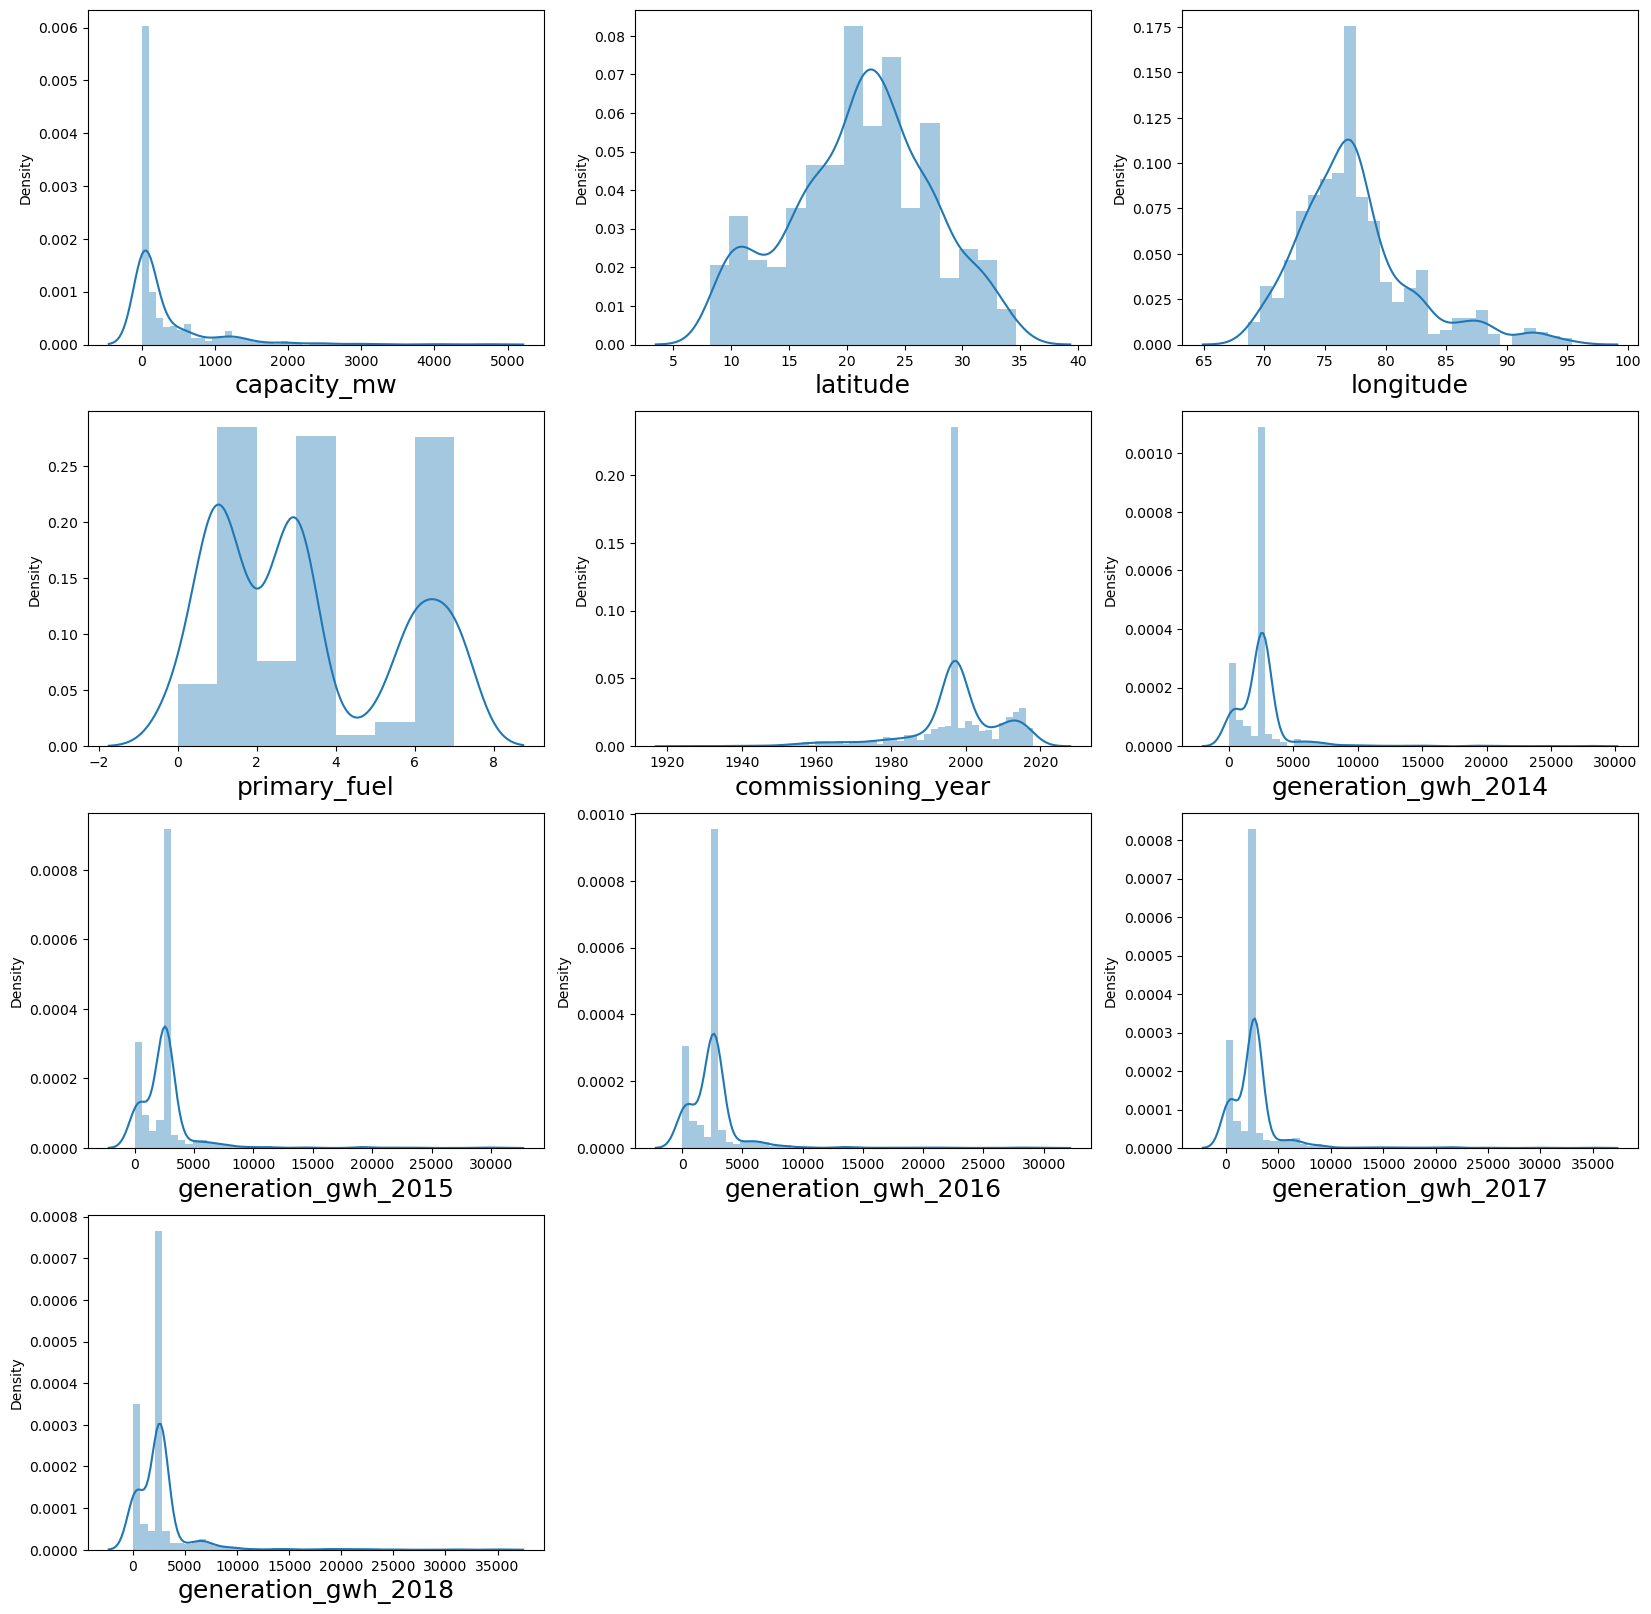

In [100]:
# plotting distplot plot to check the skewness 
plt.figure(figsize = (20,20))
plt_num =1

for column in df1:
    if plt_num<=20:
        ax = plt.subplot(4,3,plt_num)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize = 18)
    plt_num+=1
plt.show()

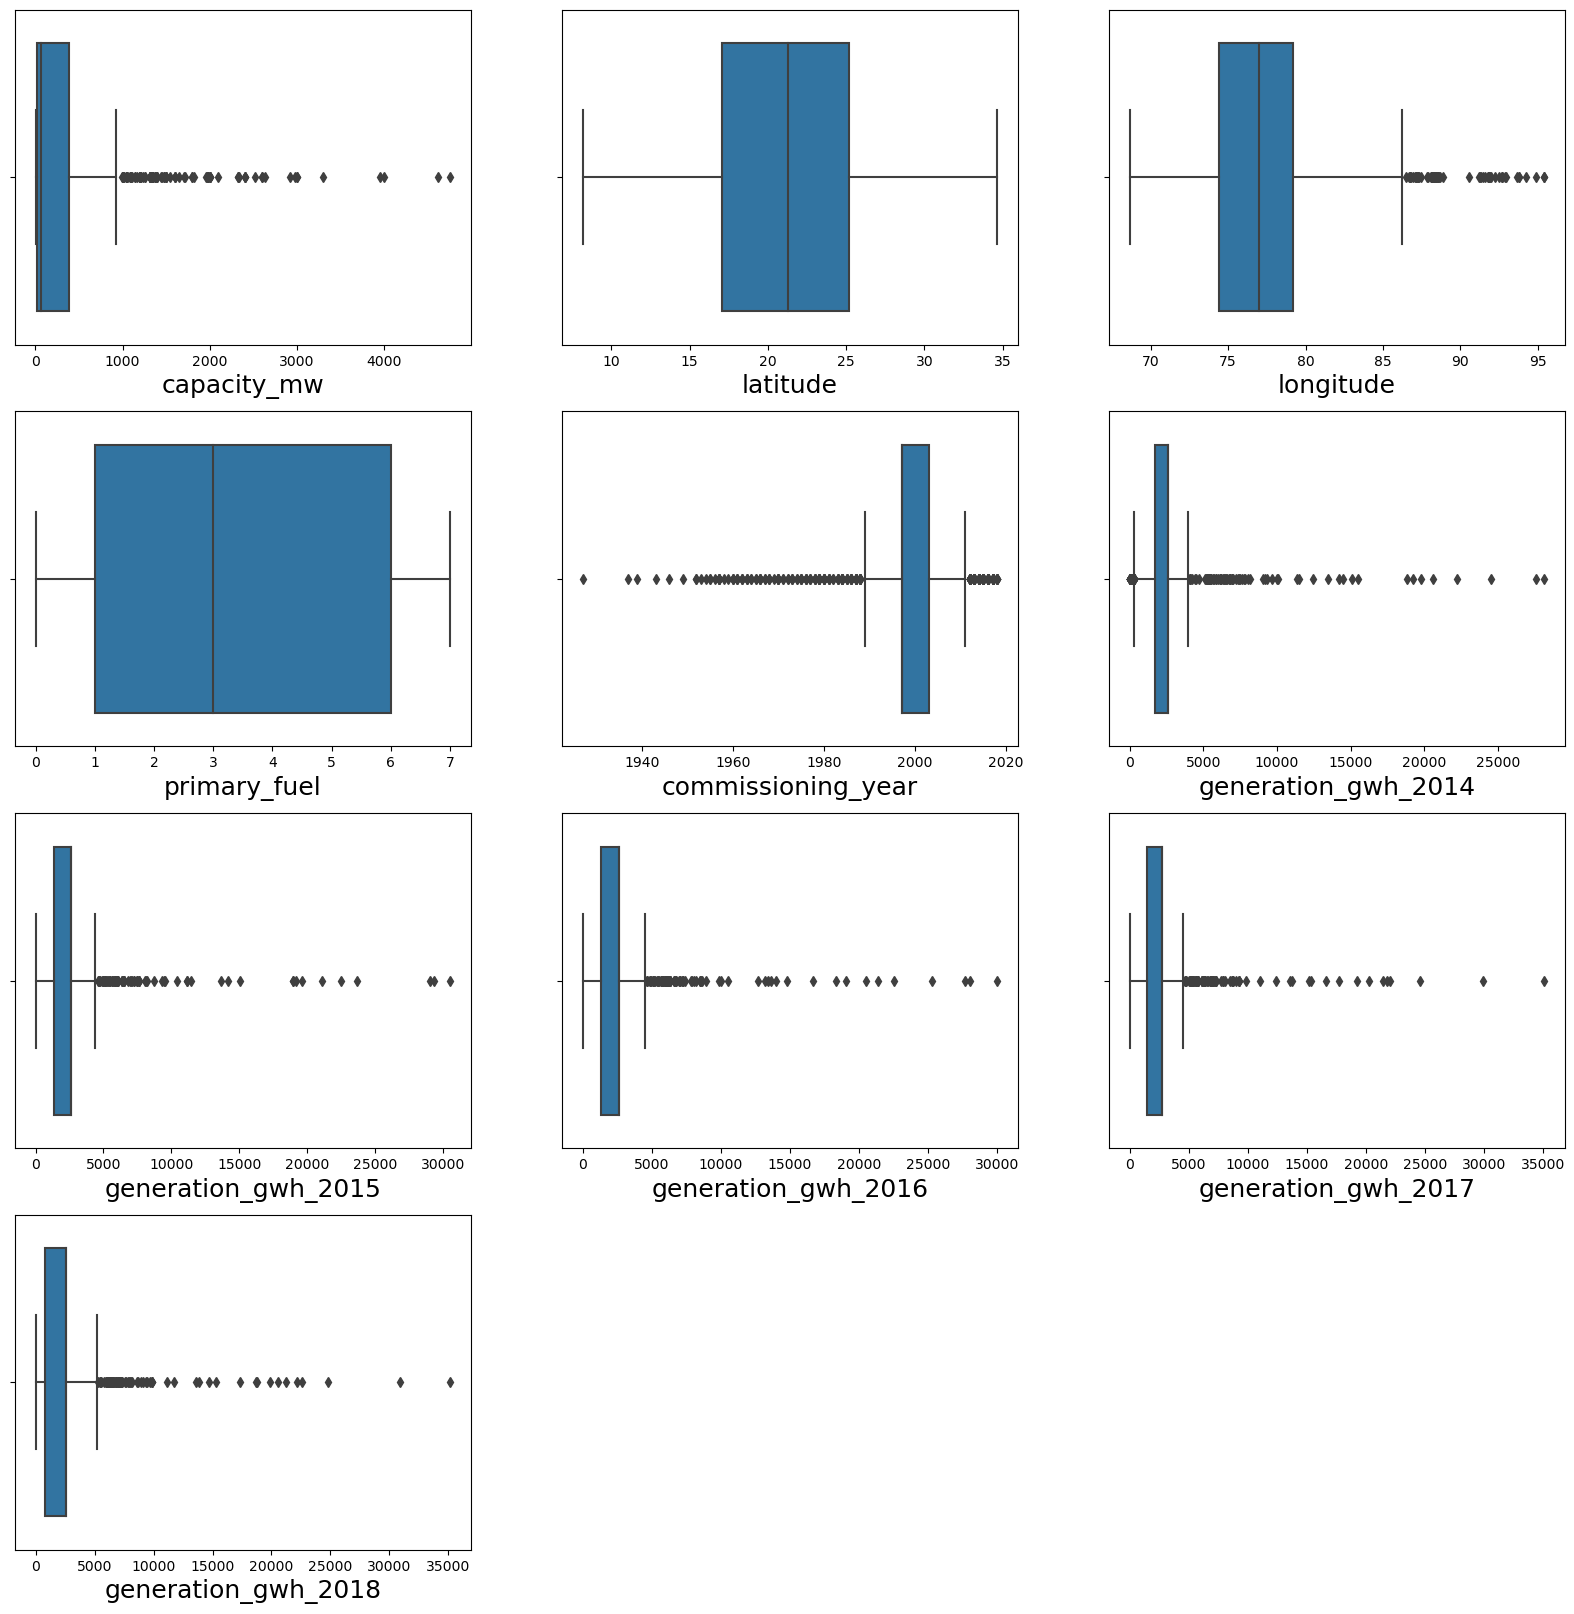

In [101]:
# plotting box plot to check outliers in the data set
plt.figure(figsize = (20,20))
plt_num =1

for column in df1:
    if plt_num<=20:
        sx = plt.subplot(4,3,plt_num)
        sns.boxplot(df1[column])
        plt.xlabel(column,fontsize = 18)
    plt_num+=1
plt.show()

In [102]:
#finding the outliers 
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr = q3- q1

In [103]:
iqr

capacity_mw             368.275000
latitude                  8.104450
longitude                 4.817200
primary_fuel              5.000000
commissioning_year        5.908918
generation_gwh_2014     915.418657
generation_gwh_2015    1213.124538
generation_gwh_2016    1273.029282
generation_gwh_2017    1260.248865
generation_gwh_2018    1775.961758
dtype: float64

In [104]:
# Removing outliers in the capacity_mw columns
cap = (q3.capacity_mw + (0.5 * iqr.capacity_mw))
cap

index = np.where(df1['capacity_mw']>cap)
index

df1 = df1.drop(df1.index[index])
df1.shape

df1.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6.0,2011.000000,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
1,1,98.0,24.7663,74.6090,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
2,2,39.2,21.9038,69.3732,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
3,3,135.0,23.8712,91.3602,2.0,2004.000000,617.789264,843.747000,886.004428,663.77450,626.239128
4,5,250.0,23.7689,68.6447,1.0,2005.000000,1153.421000,1208.852000,1175.765000,1147.91300,976.655000
...,...,...,...,...,...,...,...,...,...,...,...
727,901,106.6,13.1156,77.5838,5.0,1993.000000,2431.823590,2428.226946,2467.936859,2733.05089,0.000000
728,903,3.0,12.8932,78.1654,6.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
729,904,25.5,15.2758,75.5811,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
730,905,80.0,24.3500,73.7477,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099


In [105]:
# Removing outliers in the longitude columns
long = (q3.longitude + (1.5 * iqr.longitude))
long

index = np.where(df1['longitude']>long)
index

df1 = df1.drop(df1.index[index])
df1.shape

df1.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6.0,2011.000000,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
1,1,98.0,24.7663,74.6090,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
2,2,39.2,21.9038,69.3732,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
3,5,250.0,23.7689,68.6447,1.0,2005.000000,1153.421000,1208.852000,1175.765000,1147.91300,976.655000
4,6,60.0,10.4547,77.0078,3.0,1970.000000,157.558250,152.195200,61.421350,89.62960,48.327150
...,...,...,...,...,...,...,...,...,...,...,...
681,901,106.6,13.1156,77.5838,5.0,1993.000000,2431.823590,2428.226946,2467.936859,2733.05089,0.000000
682,903,3.0,12.8932,78.1654,6.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
683,904,25.5,15.2758,75.5811,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
684,905,80.0,24.3500,73.7477,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099


In [106]:
# Removing outliers in the commissioning_year columns
com= (q3.commissioning_year + (1.5 * iqr.commissioning_year))
com

index = np.where(df1['commissioning_year']>com)
index

df1 = df1.drop(df1.index[index])
df1.shape

df1.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6.0,2011.000000,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
1,1,98.0,24.7663,74.6090,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
2,2,39.2,21.9038,69.3732,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
3,5,250.0,23.7689,68.6447,1.0,2005.000000,1153.421000,1208.852000,1175.765000,1147.91300,976.655000
4,6,60.0,10.4547,77.0078,3.0,1970.000000,157.558250,152.195200,61.421350,89.62960,48.327150
...,...,...,...,...,...,...,...,...,...,...,...
629,901,106.6,13.1156,77.5838,5.0,1993.000000,2431.823590,2428.226946,2467.936859,2733.05089,0.000000
630,903,3.0,12.8932,78.1654,6.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
631,904,25.5,15.2758,75.5811,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
632,905,80.0,24.3500,73.7477,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099


In [107]:
# Removing outliers in the generation_gwh_2013 columns
long = (q3.generation_gwh_2014 + (1.5 * iqr.generation_gwh_2014))
long

index = np.where(df1['generation_gwh_2014']>long)
index

df1 = df1.drop(df1.index[index])
df1.shape

df1.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6.0,2011.000000,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
1,1,98.0,24.7663,74.6090,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
2,2,39.2,21.9038,69.3732,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
3,5,250.0,23.7689,68.6447,1.0,2005.000000,1153.421000,1208.852000,1175.765000,1147.91300,976.655000
4,6,60.0,10.4547,77.0078,3.0,1970.000000,157.558250,152.195200,61.421350,89.62960,48.327150
...,...,...,...,...,...,...,...,...,...,...,...
629,901,106.6,13.1156,77.5838,5.0,1993.000000,2431.823590,2428.226946,2467.936859,2733.05089,0.000000
630,903,3.0,12.8932,78.1654,6.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
631,904,25.5,15.2758,75.5811,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
632,905,80.0,24.3500,73.7477,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099


In [108]:
# Removing outliers in the generation_gwh_2015 columns
long = (q3.generation_gwh_2015 + (1.5 * iqr.generation_gwh_2015))
long

index = np.where(df1['generation_gwh_2015']>long)
index

df1 = df1.drop(df1.index[index])
df1.shape

df1.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6.0,2011.000000,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
1,1,98.0,24.7663,74.6090,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
2,2,39.2,21.9038,69.3732,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
3,5,250.0,23.7689,68.6447,1.0,2005.000000,1153.421000,1208.852000,1175.765000,1147.91300,976.655000
4,6,60.0,10.4547,77.0078,3.0,1970.000000,157.558250,152.195200,61.421350,89.62960,48.327150
...,...,...,...,...,...,...,...,...,...,...,...
629,901,106.6,13.1156,77.5838,5.0,1993.000000,2431.823590,2428.226946,2467.936859,2733.05089,0.000000
630,903,3.0,12.8932,78.1654,6.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
631,904,25.5,15.2758,75.5811,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
632,905,80.0,24.3500,73.7477,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099


In [109]:
# Removing outliers in the generation_gwh_2016 columns
long = (q3.generation_gwh_2016 + (1.5 * iqr.generation_gwh_2016))
long

index = np.where(df1['generation_gwh_2016']>long)
index

df1 = df1.drop(df1.index[index])
df1.shape

df1.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6.0,2011.000000,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
1,1,98.0,24.7663,74.6090,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
2,2,39.2,21.9038,69.3732,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
3,5,250.0,23.7689,68.6447,1.0,2005.000000,1153.421000,1208.852000,1175.765000,1147.91300,976.655000
4,6,60.0,10.4547,77.0078,3.0,1970.000000,157.558250,152.195200,61.421350,89.62960,48.327150
...,...,...,...,...,...,...,...,...,...,...,...
629,901,106.6,13.1156,77.5838,5.0,1993.000000,2431.823590,2428.226946,2467.936859,2733.05089,0.000000
630,903,3.0,12.8932,78.1654,6.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
631,904,25.5,15.2758,75.5811,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
632,905,80.0,24.3500,73.7477,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099


In [110]:
# Removing outliers in the generation_gwh_2017 columns
long = (q3.generation_gwh_2017 + (1.5 * iqr.generation_gwh_2017))
long

index = np.where(df1['generation_gwh_2017']>long)
index

df1 = df1.drop(df1.index[index])
df1.shape

df1.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6.0,2011.000000,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
1,1,98.0,24.7663,74.6090,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
2,2,39.2,21.9038,69.3732,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
3,5,250.0,23.7689,68.6447,1.0,2005.000000,1153.421000,1208.852000,1175.765000,1147.91300,976.655000
4,6,60.0,10.4547,77.0078,3.0,1970.000000,157.558250,152.195200,61.421350,89.62960,48.327150
...,...,...,...,...,...,...,...,...,...,...,...
629,901,106.6,13.1156,77.5838,5.0,1993.000000,2431.823590,2428.226946,2467.936859,2733.05089,0.000000
630,903,3.0,12.8932,78.1654,6.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
631,904,25.5,15.2758,75.5811,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
632,905,80.0,24.3500,73.7477,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099


In [111]:
# Removing outliers in the generation_gwh_2018 columns
long = (q3.generation_gwh_2018 + (1.5 * iqr.generation_gwh_2018))
long

index = np.where(df1['generation_gwh_2018']>long)
index

df1 = df1.drop(df1.index[index])
df1.shape

df1.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6.0,2011.000000,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
1,1,98.0,24.7663,74.6090,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
2,2,39.2,21.9038,69.3732,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
3,5,250.0,23.7689,68.6447,1.0,2005.000000,1153.421000,1208.852000,1175.765000,1147.91300,976.655000
4,6,60.0,10.4547,77.0078,3.0,1970.000000,157.558250,152.195200,61.421350,89.62960,48.327150
...,...,...,...,...,...,...,...,...,...,...,...
629,901,106.6,13.1156,77.5838,5.0,1993.000000,2431.823590,2428.226946,2467.936859,2733.05089,0.000000
630,903,3.0,12.8932,78.1654,6.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
631,904,25.5,15.2758,75.5811,7.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
632,905,80.0,24.3500,73.7477,1.0,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099


In [112]:
#splitting labels and features
x = df1.drop(columns = ['primary_fuel'])
y = df1['primary_fuel']

In [113]:
x

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.000000,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
1,98.0,24.7663,74.6090,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
2,39.2,21.9038,69.3732,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
5,250.0,23.7689,68.6447,2005.000000,1153.421000,1208.852000,1175.765000,1147.91300,976.655000
6,60.0,10.4547,77.0078,1970.000000,157.558250,152.195200,61.421350,89.62960,48.327150
...,...,...,...,...,...,...,...,...,...
901,106.6,13.1156,77.5838,1993.000000,2431.823590,2428.226946,2467.936859,2733.05089,0.000000
903,3.0,12.8932,78.1654,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
904,25.5,15.2758,75.5811,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099
905,80.0,24.3500,73.7477,1997.091082,2602.906657,2583.587438,2638.531572,2733.05089,2600.804099


In [114]:
y

0      6.0
1      1.0
2      7.0
5      1.0
6      3.0
      ... 
901    5.0
903    6.0
904    7.0
905    1.0
906    7.0
Name: primary_fuel, Length: 634, dtype: float64

In [115]:
#Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.653532,1.213555,-0.841953,1.499176,0.556366,0.552446,0.558171,0.555907,0.603505
1,0.137994,0.665948,-0.413226,0.295809,0.556366,0.552446,0.558171,0.555907,0.603505
2,-0.349354,0.207285,-2.053751,0.295809,0.556366,0.552446,0.558171,0.555907,0.603505
3,1.397806,0.506133,-2.282011,0.980070,-0.996852,-0.907192,-0.954168,-1.035635,-1.008914
4,-0.176959,-1.627221,0.338387,-2.048048,-2.063983,-2.029106,-2.106276,-2.098193,-1.930537
...,...,...,...,...,...,...,...,...,...
629,0.209273,-1.200861,0.518864,-0.058142,0.373040,0.387490,0.381795,0.555907,-1.978515
630,-0.649388,-1.236497,0.701096,0.295809,0.556366,0.552446,0.558171,0.555907,0.603505
631,-0.462903,-0.854729,-0.108639,0.295809,0.556366,0.552446,0.558171,0.555907,0.603505
632,-0.011194,0.599243,-0.683096,0.295809,0.556366,0.552446,0.558171,0.555907,0.603505


In [116]:
#Finding variance inflation factor in each scaled column i.e x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,1.308847,capacity_mw
1,1.059565,latitude
2,1.168055,longitude
3,1.195371,commissioning_year
4,17.218109,generation_gwh_2014
5,13.794556,generation_gwh_2015
6,20.438619,generation_gwh_2016
7,17.624271,generation_gwh_2017
8,7.352345,generation_gwh_2018


The column name generation_gwh_2014 and generation_gwh_2016 are highly correlated,so we can drop these columns

In [117]:
x.drop(columns=['generation_gwh_2014','generation_gwh_2016'],axis=1,inplace=True)

In [118]:
x

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018
0,-0.653532,1.213555,-0.841953,1.499176,0.552446,0.555907,0.603505
1,0.137994,0.665948,-0.413226,0.295809,0.552446,0.555907,0.603505
2,-0.349354,0.207285,-2.053751,0.295809,0.552446,0.555907,0.603505
3,1.397806,0.506133,-2.282011,0.980070,-0.907192,-1.035635,-1.008914
4,-0.176959,-1.627221,0.338387,-2.048048,-2.029106,-2.098193,-1.930537
...,...,...,...,...,...,...,...
629,0.209273,-1.200861,0.518864,-0.058142,0.387490,0.555907,-1.978515
630,-0.649388,-1.236497,0.701096,0.295809,0.552446,0.555907,0.603505
631,-0.462903,-0.854729,-0.108639,0.295809,0.552446,0.555907,0.603505
632,-0.011194,0.599243,-0.683096,0.295809,0.552446,0.555907,0.603505


In [119]:
#splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 48)

In [172]:
# Applying DecisonTreeClassifier Algorithm for classification problem
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [121]:
# Applying the Algorithm into training data
dtc.score(x_train,y_train)

1.0

In [122]:
# predicting the values
preddtc = dtc.predict(x_test)

In [124]:
#Accuracy score of DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,preddtc)

0.774869109947644

In [125]:
print(confusion_matrix(y_test,preddtc))

[[11  1  0  0  0  0  0  2]
 [ 2 17  2  1  0  2  1  0]
 [ 0  2  4  2  0  3  0  0]
 [ 0  0  0 59  1  2  0  2]
 [ 0  0  0  0  0  1  0  0]
 [ 0  1  2  1  0  2  0  0]
 [ 2  2  0  1  0  0 28  5]
 [ 0  2  0  0  0  0  3 27]]


In [126]:
print(classification_report(preddtc,y_test))

              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76        15
         1.0       0.68      0.68      0.68        25
         2.0       0.36      0.50      0.42         8
         3.0       0.92      0.92      0.92        64
         4.0       0.00      0.00      0.00         1
         5.0       0.33      0.20      0.25        10
         6.0       0.74      0.88      0.80        32
         7.0       0.84      0.75      0.79        36

    accuracy                           0.77       191
   macro avg       0.58      0.58      0.58       191
weighted avg       0.77      0.77      0.77       191



In [129]:
#Cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(dtc,x,y,cv = 5)

array([0.67716535, 0.70866142, 0.73228346, 0.73228346, 0.67460317])

In [130]:
cross_val_score(DecisionTreeClassifier(),x,y,cv =5).mean()

0.7097237845269341

In [131]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
grid_param = {'criterion':['gini','entropy'],'max_depth' : range(2,6),'min_samples_leaf':range(1,6),'min_samples_split':range(1,7)}

In [133]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = dtc,param_grid = grid_param,cv = 5)

In [134]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(1, 7)})

In [135]:
#checking the best Parameter
best_param = grid_search.best_params_
print(best_param)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [136]:
#Applying the best parameters into DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 4,min_samples_leaf = 4,min_samples_split = 6)

In [137]:
#Applying the best parameters into training data
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=6)

In [140]:
#predicting the values with new Parameters
pred_dtc = dt.predict(x_test)
pred_dtc

array([6., 7., 7., 1., 7., 6., 6., 7., 7., 3., 7., 3., 7., 7., 3., 3., 7.,
       3., 7., 3., 3., 6., 7., 7., 3., 1., 7., 6., 3., 7., 3., 3., 3., 3.,
       7., 7., 6., 1., 3., 3., 1., 3., 3., 3., 7., 7., 7., 3., 7., 3., 3.,
       3., 7., 7., 1., 2., 7., 3., 7., 3., 7., 7., 7., 1., 3., 7., 3., 3.,
       7., 3., 7., 3., 3., 1., 3., 3., 1., 3., 7., 7., 3., 3., 6., 3., 6.,
       7., 7., 7., 3., 6., 5., 7., 3., 7., 6., 3., 7., 1., 7., 3., 3., 6.,
       2., 7., 3., 7., 7., 3., 6., 1., 5., 6., 3., 3., 1., 1., 3., 3., 7.,
       7., 3., 3., 7., 7., 7., 3., 6., 3., 1., 3., 7., 7., 3., 7., 3., 6.,
       3., 3., 7., 1., 7., 3., 7., 1., 6., 6., 7., 2., 1., 3., 7., 2., 7.,
       3., 3., 3., 7., 1., 7., 3., 3., 3., 3., 3., 3., 1., 7., 7., 3., 3.,
       7., 7., 1., 3., 6., 7., 3., 7., 2., 7., 1., 7., 7., 7., 3., 7., 3.,
       1., 7., 7., 6.])

In [141]:
accuracy_score(y_test,pred_dtc)

0.5916230366492147

In [143]:
# Using KNeighborsClasssifer Algorithm for classification problem
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [144]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [145]:
#predicting the data using KNeighborsClasssifer
predknn = knn.predict(x_test)
predknn

array([6., 7., 0., 6., 0., 6., 6., 1., 5., 3., 2., 3., 7., 7., 6., 7., 7.,
       1., 0., 2., 3., 6., 1., 7., 1., 7., 0., 6., 3., 7., 3., 1., 3., 3.,
       7., 0., 6., 1., 3., 3., 6., 3., 3., 3., 1., 0., 0., 3., 7., 3., 3.,
       3., 5., 0., 1., 2., 7., 3., 7., 3., 6., 0., 1., 6., 0., 7., 3., 2.,
       0., 3., 7., 7., 3., 1., 7., 3., 6., 5., 7., 3., 3., 3., 0., 3., 6.,
       0., 7., 6., 5., 0., 3., 1., 3., 0., 6., 3., 7., 1., 3., 3., 3., 6.,
       2., 5., 3., 1., 7., 3., 1., 1., 1., 6., 2., 3., 7., 1., 7., 3., 7.,
       0., 3., 3., 6., 0., 7., 7., 6., 6., 1., 3., 7., 0., 3., 7., 3., 6.,
       3., 3., 0., 1., 7., 3., 1., 6., 6., 6., 1., 2., 1., 3., 0., 2., 1.,
       3., 3., 2., 7., 1., 0., 3., 3., 0., 3., 3., 3., 6., 1., 7., 3., 3.,
       5., 1., 6., 3., 6., 7., 2., 7., 3., 1., 1., 7., 7., 1., 3., 7., 3.,
       6., 0., 1., 6.])

In [146]:
print(accuracy_score(predknn,y_test))

0.7015706806282722


In [147]:
print(confusion_matrix(predknn,y_test))

[[12  2  0  2  0  1  6  0]
 [ 0 17  2  2  0  1  3  5]
 [ 0  0  5  2  0  3  0  0]
 [ 0  4  4 50  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  2  0  0  1  1  1  1]
 [ 0  0  0  2  0  0 25  2]
 [ 2  0  0  6  0  0  3 24]]


In [148]:
print(classification_report(predknn,y_test))

              precision    recall  f1-score   support

         0.0       0.86      0.52      0.65        23
         1.0       0.68      0.57      0.62        30
         2.0       0.45      0.50      0.48        10
         3.0       0.78      0.86      0.82        58
         4.0       0.00      0.00      0.00         0
         5.0       0.17      0.17      0.17         6
         6.0       0.66      0.86      0.75        29
         7.0       0.75      0.69      0.72        35

    accuracy                           0.70       191
   macro avg       0.54      0.52      0.52       191
weighted avg       0.71      0.70      0.70       191



In [149]:
#cross validation for cross checking the accuracy score
cross_val_score(KNeighborsClassifier(),x,y,cv =5).mean()

0.6861517310336207

In [150]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
param_grid = { 'algorithm' : ['kd_tree','brute'],'leaf_size' : [7,9,11,13,15],'n_neighbors' : [3,5,7,9,11,23]}

In [151]:
gri_se = GridSearchCV(estimator = knn,param_grid = param_grid)
gri_se.fit(x_train,y_train)
gri_se.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_neighbors': 3}

In [152]:
#Using kdtree for nearest neighbor with leafsize 
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3 , n_neighbors = 2)

In [153]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=2)

In [155]:
#Predicting the values
pred_knn = knn.predict(x_test)
pred_knn

array([6., 7., 3., 6., 0., 6., 6., 1., 2., 1., 2., 3., 0., 7., 3., 3., 7.,
       1., 7., 2., 3., 6., 1., 7., 1., 7., 0., 6., 3., 7., 3., 3., 3., 3.,
       7., 0., 6., 1., 3., 3., 6., 3., 3., 3., 1., 0., 0., 1., 3., 3., 3.,
       3., 2., 0., 1., 2., 7., 3., 6., 3., 6., 0., 1., 6., 0., 7., 3., 2.,
       0., 2., 7., 7., 3., 3., 3., 3., 6., 2., 7., 3., 3., 3., 0., 3., 6.,
       0., 7., 6., 5., 0., 3., 1., 3., 0., 6., 2., 7., 1., 3., 3., 3., 6.,
       2., 5., 3., 1., 0., 2., 0., 1., 4., 6., 2., 3., 7., 1., 3., 3., 7.,
       0., 3., 3., 6., 0., 7., 3., 6., 3., 1., 3., 7., 0., 3., 1., 3., 6.,
       3., 3., 0., 1., 7., 3., 1., 6., 6., 6., 7., 2., 1., 3., 0., 2., 0.,
       3., 3., 1., 7., 1., 0., 3., 3., 0., 3., 3., 2., 6., 0., 0., 2., 3.,
       5., 1., 6., 3., 6., 7., 2., 7., 3., 1., 1., 7., 7., 1., 3., 6., 3.,
       6., 0., 0., 6.])

In [156]:
#confusion matrix after hyperparameter tunning
print(confusion_matrix(y_test,pred_knn))

[[13  0  0  0  0  0  0  1]
 [ 5 15  1  3  0  1  0  0]
 [ 0  1  7  2  1  0  0  0]
 [ 1  2  4 55  0  0  0  2]
 [ 0  0  0  0  0  1  0  0]
 [ 1  1  4  0  0  0  0  0]
 [ 8  2  0  0  0  1 26  1]
 [ 0  5  1  1  0  0  3 22]]


In [157]:
#classification report after hyperparameter tunning
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

         0.0       0.46      0.93      0.62        14
         1.0       0.58      0.60      0.59        25
         2.0       0.41      0.64      0.50        11
         3.0       0.90      0.86      0.88        64
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         6
         6.0       0.90      0.68      0.78        38
         7.0       0.85      0.69      0.76        32

    accuracy                           0.72       191
   macro avg       0.51      0.55      0.52       191
weighted avg       0.76      0.72      0.73       191



In [159]:
#splitting the dataset into features and labels for regression problem
p = df1.drop(columns = ['capacity_mw','generation_gwh_2014','generation_gwh_2017'])
q = df1['capacity_mw']

In [160]:
p

,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2015,generation_gwh_2016,generation_gwh_2018
0,28.1839,73.2407,6.0,2011.000000,2583.587438,2638.531572,2600.804099
1,24.7663,74.6090,1.0,1997.091082,2583.587438,2638.531572,2600.804099
2,21.9038,69.3732,7.0,1997.091082,2583.587438,2638.531572,2600.804099
5,23.7689,68.6447,1.0,2005.000000,1208.852000,1175.765000,976.655000
6,10.4547,77.0078,3.0,1970.000000,152.195200,61.421350,48.327150
...,...,...,...,...,...,...,...
901,13.1156,77.5838,5.0,1993.000000,2428.226946,2467.936859,0.000000
903,12.8932,78.1654,6.0,1997.091082,2583.587438,2638.531572,2600.804099
904,15.2758,75.5811,7.0,1997.091082,2583.587438,2638.531572,2600.804099
905,24.3500,73.7477,1.0,1997.091082,2583.587438,2638.531572,2600.804099


In [161]:
q

0        2.5
1       98.0
2       39.2
5      250.0
6       60.0
       ...  
901    106.6
903      3.0
904     25.5
905     80.0
906     16.5
Name: capacity_mw, Length: 634, dtype: float64

In [162]:
#Transforming the dataset into standard form using StandardScaler 
scaler = StandardScaler()
x_scaler = scaler.fit_transform(p)

In [163]:
#splitting the data into training and testing 
p_train,p_test,q_train,q_test =  train_test_split(x_scaler,q,test_size = 0.25,random_state = 435)

In [164]:
#Using KNeighborsRegressor for regression problem
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(p_train,q_train)

KNeighborsRegressor()

In [165]:
#predicting the value
predknn = kn.predict(p_test)
predknn

array([ 24.87      ,  11.8       ,  72.4       ,  40.44      ,
       193.5       ,  80.34475105,  59.04      ,  46.76      ,
        46.76      ,  46.2       ,  64.44      ,  15.        ,
        32.8       ,  10.58      ,   5.        , 209.5       ,
        43.49      ,   8.36      , 136.88      ,  11.4       ,
         8.96      ,   2.6       ,   9.26      ,  53.4       ,
        20.8       ,  20.        ,   5.        ,   5.57      ,
        13.8       ,  82.836     ,  13.01      , 196.        ,
        42.28      ,  22.8       ,  15.3       ,  15.        ,
        17.9       ,  77.48      ,  21.4       ,  32.8       ,
        39.7       ,  14.63      ,  20.26      , 142.87      ,
        39.34      ,   5.        ,  37.13      ,  31.38      ,
       135.88      ,  12.4       ,   8.26      ,   5.36      ,
        34.81      ,  95.24      ,  37.13      , 216.        ,
        48.7       ,   8.96      ,  15.        , 307.9172    ,
        37.13      , 198.85      , 144.2348    ,  36.89

In [166]:
#model Score
kn.score(p_test,q_test)

0.4123523516778289

In [173]:
#Using Another Algorithm for Regression DecisionTreeRegresssor
dtr = DecisionTreeRegressor()
dtr.fit(p_train,q_train)

DecisionTreeRegressor()

In [174]:
#predicting the value
preddtr = dtr.predict(p_test)
preddtr

array([  6.25,  10.  ,  66.  ,  31.2 ,  35.  ,   1.  ,  36.  ,  25.6 ,
        25.6 ,  22.  ,  33.  ,   5.  ,  25.  ,   6.6 ,   5.  , 500.  ,
        20.  ,  25.  , 468.57,   2.1 ,  11.  ,   1.  ,   2.1 ,  54.  ,
        16.5 ,  15.  ,   5.  ,  13.5 ,  22.5 , 106.  ,   1.5 , 161.  ,
        12.  ,  30.  ,  15.  ,  50.  ,  18.  ,  77.65,  25.5 ,  25.  ,
        10.  ,   4.  ,   5.  , 134.  ,  16.5 ,   5.  ,  27.05,  49.  ,
        36.8 ,   9.  ,  20.  ,  25.  ,  91.8 ,  98.  ,  27.05,  94.2 ,
         2.  ,  11.  ,   5.  , 250.  ,  27.05, 114.75,  36.  ,  10.  ,
        30.75,  35.  , 450.  ,  31.4 ,  36.  , 234.  ,  30.  ,  27.05,
        33.75, 102.  ,  22.  ,  10.  , 192.  ,  27.05,  31.2 , 161.  ,
        24.8 ,  25.  ,   4.5 , 440.  ,   6.  ,   2.1 ,  36.  , 540.  ,
        99.  , 234.  ,  16.5 , 198.  ,  30.6 ,  15.  ,  67.5 ,  30.  ,
       192.  ,  50.4 ,  10.  ,  94.8 ,   6.25,  60.  , 120.  ,  11.2 ,
        41.  ,   5.  , 207.  ,  19.8 ,   5.8 ,  54.  , 400.  ,  50.4 ,
      

In [175]:
#model Score
dtr.score(p_test,q_test)

0.4619801026436833